**Goal of the A/B Test Project**

This dataset represents an experiment where users were shown two different landing pages:

- Old landing page → shown to the control group
- New landing page → shown to the treatment group

The company wants to know whether switching to the new landing page will increase conversion.

Is the conversion rate of the treatment group significantly higher than the control group?

- If yes → recommend launching the new page.
- If no → keep the old page.

Null Hypothesis (H₀):
The new landing page does NOT increase conversion compared to the old page.
𝑝𝑛𝑒𝑤≤𝑝𝑜𝑙𝑑

Alternative Hypothesis (H₁):
The new landing page increases conversion.
𝑝𝑛𝑒𝑤>𝑝𝑜𝑙𝑑

This is a one-tailed test, because we only care if it is better, not just different.

We chose the hypothesis because:

The business goal is to check if the new landing page increases conversions. Therefore, the null hypothesis assumes no improvement.
The alternative hypothesis assumes positive improvement.This naturally leads to a one-tailed hypothesis test.


Conversion Rate= Number of converted users /  Total users


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# Check for missing values

In [4]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

# Check for data incosistencies

Sometimes: A user in control is shown new_page Or a user in treatment is shown old_page This is INVALID data.So we must remove mismatched rows.

In [7]:
# Check mismatched rows
mismatched = df[
    ((df['group'] == 'control') & (df['landing_page'] == 'new_page')) |
    ((df['group'] == 'treatment') & (df['landing_page'] == 'old_page'))
]

mismatched.head(), mismatched.shape
# Clean the data if mismtached exist 

(     user_id timestamp      group landing_page  converted
 22    767017   58:15.0    control     new_page          0
 240   733976   11:16.4    control     new_page          0
 308   857184   34:59.8  treatment     old_page          0
 327   686623   26:40.7  treatment     old_page          0
 357   856078   29:30.4  treatment     old_page          0,
 (3893, 5))

In [8]:
df_clean = df[
    ((df['group'] == 'control') & (df['landing_page'] == 'old_page')) |
    ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
]


In [9]:
df_clean[
    ((df_clean['group'] == 'control') & (df_clean['landing_page'] == 'new_page')) |
    ((df_clean['group'] == 'treatment') & (df_clean['landing_page'] == 'old_page'))
]

,user_id,timestamp,group,landing_page,converted


# Compute Conversion Rate

In [10]:
# Conversion rate for control
control_rate = df_clean[df_clean['group']=='control']['converted'].mean()

# Conversion rate for treatment
treatment_rate = df_clean[df_clean['group']=='treatment']['converted'].mean()

control_rate, treatment_rate

(0.1203863045004612, 0.11880561271187023)

# Two-Proportion Z-Test

Why this test?

- Our outcome is binary (converted or not)
- We are comparing two proportions

In [17]:
# ! pip install statsmodels

In [13]:
from statsmodels.stats.proportion import proportions_ztest

In [14]:
# Count conversions
control_converted = df_clean[df_clean['group']=='control']['converted'].sum()
treatment_converted = df_clean[df_clean['group']=='treatment']['converted'].sum()

control_converted, treatment_converted

(17489, 17264)

In [15]:
# Sample sizes
control_total = df_clean[df_clean['group']=='control'].shape[0]
treatment_total = df_clean[df_clean['group']=='treatment'].shape[0]

control_total, treatment_total

(145274, 145313)

In [16]:
17489/145274

0.1203863045004612

In [18]:
# Z-test (one-tailed test)
z_stat, p_value = proportions_ztest(
    [treatment_converted, control_converted],
    [treatment_total, control_total],
    alternative='larger'
)

z_stat, p_value

(-1.31297418987394, 0.9054041772835275)

**Interpretation:**

- p < 0.05 → significant → new page performs better
- p ≥ 0.05 → not significant → keep old page

In [19]:
if p_value < 0.05:
    print("Statistically significant: the new page performs better.")
else:
    print("Not statistically significant: the new page does NOT perform better.")

Not statistically significant: the new page does NOT perform better.


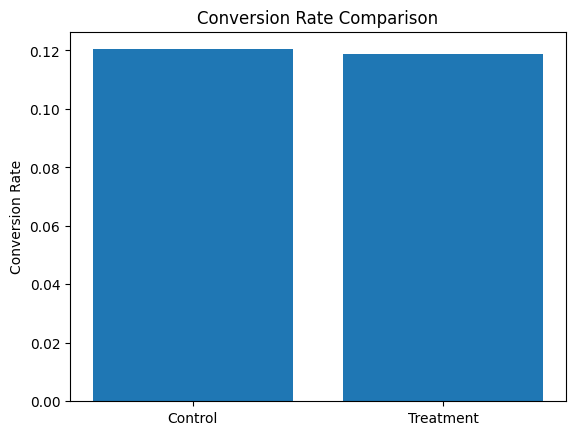

In [20]:
import matplotlib.pyplot as plt

rates = [control_rate, treatment_rate]
labels = ['Control', 'Treatment']

plt.bar(labels, rates)
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate Comparison")
plt.show()